In [134]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('diabetic_data.csv') 

In [135]:
data.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [136]:
data = data.drop('encounter_id', axis=1)


In [137]:
data.shape

(101766, 49)

In [138]:
data.isnull().sum()

patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitaz

In [139]:
data = data.replace('?', np.nan)

In [140]:
data.head(10)

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,...,No,No,No,No,No,No,No,No,No,NO
1,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
3,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,NaN,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,84259809,Caucasian,Male,[60-70),NaN,3,1,2,4,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,114882984,Caucasian,Male,[70-80),NaN,1,1,7,5,NaN,...,No,No,No,No,No,No,No,No,Yes,>30
8,48330783,Caucasian,Female,[80-90),NaN,2,1,4,13,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,63555939,Caucasian,Female,[90-100),NaN,3,3,4,12,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [141]:
data.isnull().sum()

patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide     

In [142]:

# Convert 'readmitted' to binary classification
def convert_readmission(value):
  if value == '<30':
    return 1
  else:
    return 0

data['readmitted'] = data['readmitted'].apply(convert_readmission)




In [143]:
display(data.iloc[12])

patient_nbr                               85504905
race                                     Caucasian
gender                                      Female
age                                        [40-50)
weight                                         NaN
admission_type_id                                1
discharge_disposition_id                         3
admission_source_id                              7
time_in_hospital                                 7
payer_code                                     NaN
medical_specialty           Family/GeneralPractice
num_lab_procedures                              60
num_procedures                                   0
num_medications                                 15
number_outpatient                                0
number_emergency                                 1
number_inpatient                                 0
diag_1                                         428
diag_2                                      250.43
diag_3                         

In [144]:
count_ones = data['readmitted'].sum()

In [145]:
print(count_ones)

11357


In [146]:
data.shape

(101766, 49)

In [147]:
data['readmitted'] = data['readmitted'].astype(bool)


In [148]:
print(data.dtypes)

patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide       

In [149]:
#removing missing columns having value more than 90%
missing_percentages = data.isnull().sum() / len(data) * 100
columns_to_drop = missing_percentages[missing_percentages > 90].index
data = data.drop(columns_to_drop, axis=1)


In [150]:
data.shape

(101766, 48)

In [151]:
# Columns with no variations
no_variation_cols = ['examide', 'citoglipton']

# Dropping them
data = data.drop(no_variation_cols, axis=1) 


In [152]:
# Columns with near_zero_variance
near_zero_variance_cols = ['repaglinide', 'nateglinide', 'chlorpropamide', 
                           'glimepiride', 'acetohexamide', 'tolbutamide', 
                           'acarbose', 'miglitol', 'troglitazone',
                           'glipizide-metformin', 'glimepiride-pioglitazone', 
                           'metformin-rosiglitazone', 'metformin-pioglitazone']

data = data.drop(near_zero_variance_cols, axis=1) 

In [153]:
data.shape

(101766, 33)

In [154]:
#dropping missing values
data.dropna(inplace=True)


In [155]:
numerical_columns = data.select_dtypes(include=np.number)

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated

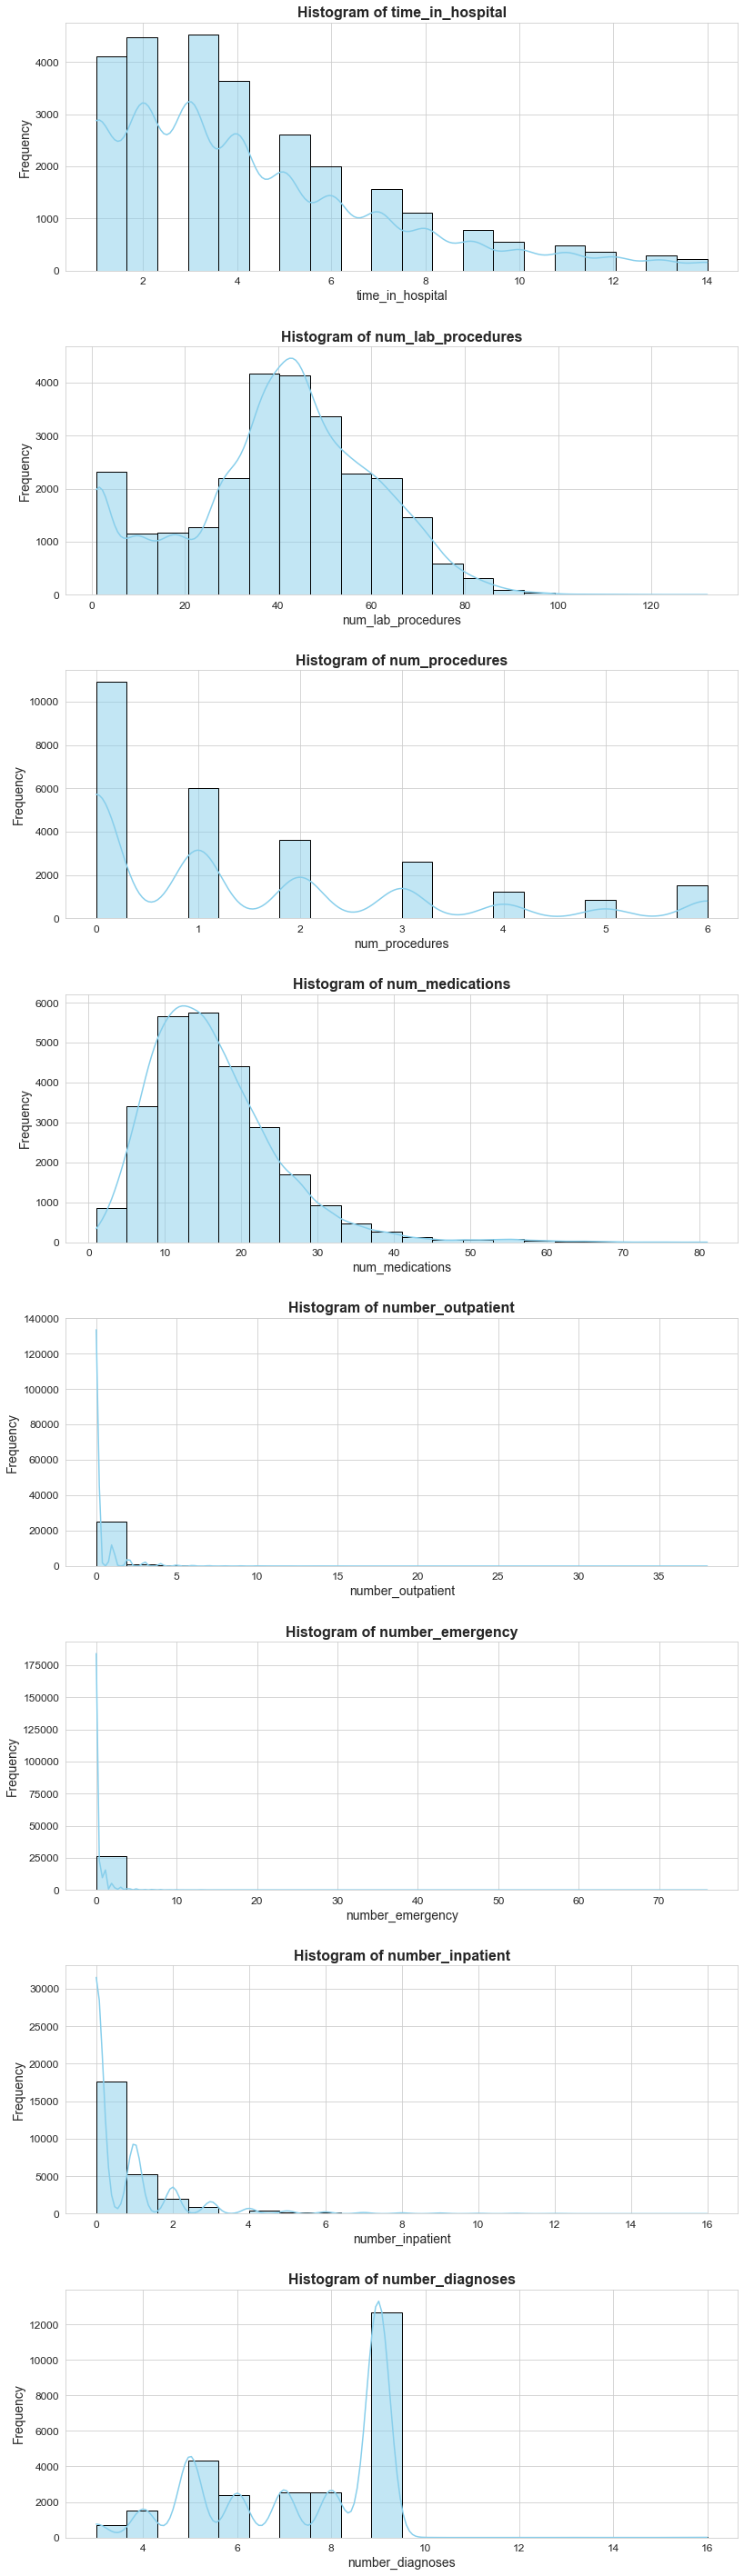

In [156]:

# Setting Seaborn style for better aesthetics
sns.set_style("whitegrid")

features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 
            'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

# Create a figure and subplots (8 rows, 1 column in this case)
fig, axes = plt.subplots(len(features), 1, figsize=(12, 40))  # Adjust figsize as needed

# Plot histograms for each feature on separate subplots
for i, feature in enumerate(features):
    sns.histplot(data[feature], bins=20, kde=True, color='skyblue', edgecolor='black', ax=axes[i])  # KDE adds density curve
    axes[i].set_xlabel(feature, fontsize=14)  # Larger font for x-axis label
    axes[i].set_ylabel('Frequency', fontsize=14)  # Larger font for y-axis label
    axes[i].set_title(f'Histogram of {feature}', fontsize=16, fontweight='bold')  # Title configuration
    axes[i].tick_params(axis='x', labelsize=12)  # Larger font for x-ticks
    axes[i].tick_params(axis='y', labelsize=12)  # Larger font for y-ticks

# Adjust layout (optional)
plt.tight_layout(pad=3.0)  # Adjust spacing between plots

# Show the plot
plt.show()


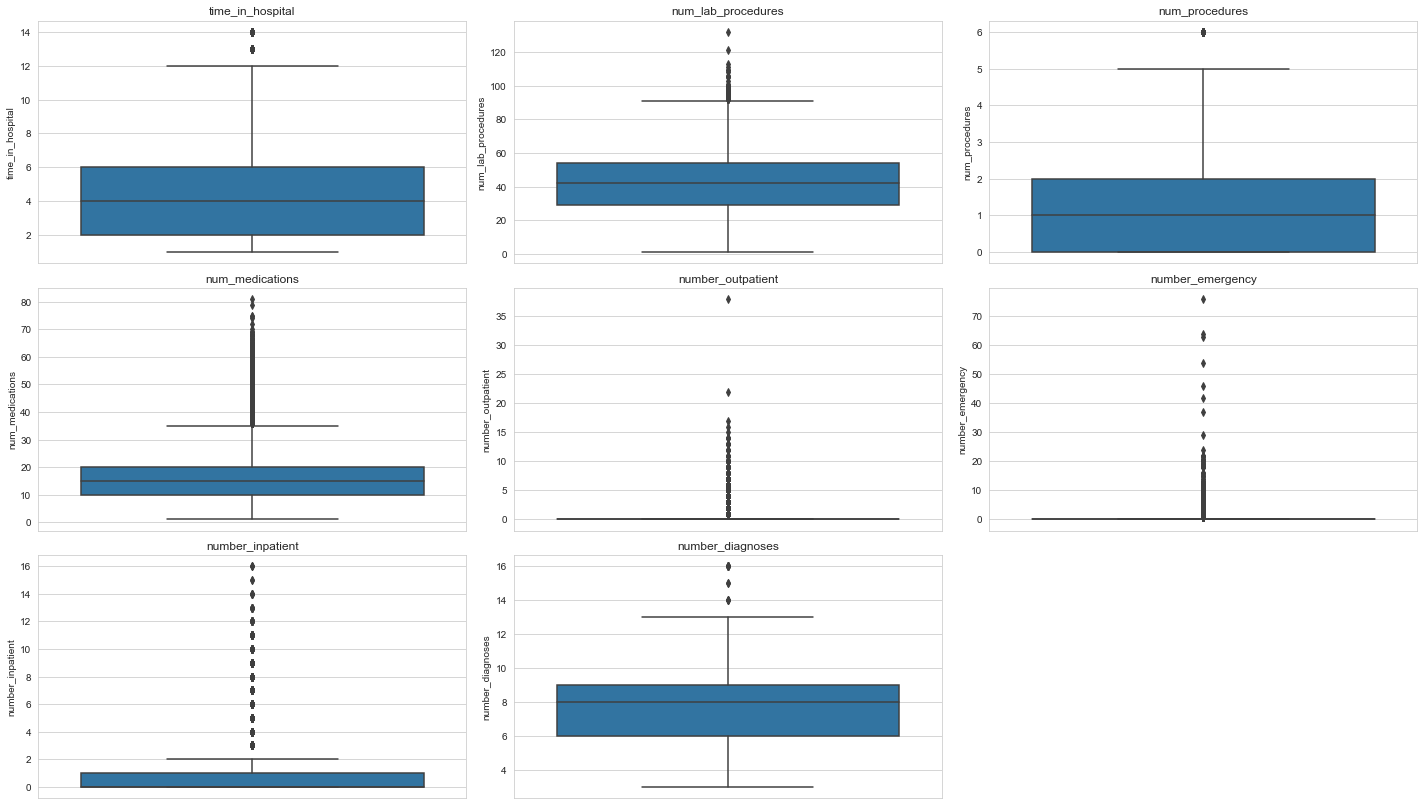

In [157]:
features_boxplot = ['time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses']

# Plotting the boxplots for each feature separately
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features_boxplot, start=1):
    plt.subplot(4, 3, i)  # Adjust the grid size according to the number of features
    sns.boxplot(y=data[feature])
    plt.title(feature)

plt.tight_layout()  # Adjust the layout to not overlap the plots
plt.show()

In [158]:
#We've clustered admission_type_id, discharge_disposition_id, and admission_source_id into similar groups, which aids in dimension reduction."
data['admission_type_id']=data['admission_type_id'].apply(lambda z : 5 if z in (6,8) else z)
data['admission_type_id']=data['admission_type_id'].apply(lambda z : 1 if z == 4 else 2 if z==7 else z )

In [159]:
#This is related to expired or Hospice, so no impact on readmission
data = data.loc[~data.discharge_disposition_id.isin([11,13,14,19,20,21])]

In [160]:
#Discharged Home: 1, 6, 8
data['discharge_disposition_id']=data['discharge_disposition_id'].apply(lambda z : 1 if z in (6,8) else z)

#Uncategorized/Unknown: 18, 25, 26, 12
data['discharge_disposition_id']=data['discharge_disposition_id'].apply(lambda z : 18 if z in (25,26,12) else z)

# Discharged/Transferred to Hospital: 2, 9, 10, 23, 27, 28, 29
data['discharge_disposition_id']=data['discharge_disposition_id'].apply(lambda z : 2 if z in ( 9, 10, 23, 27, 28, 29) else z)

#Discharged/Transferred to Care Facility: 3, 4, 5, 15, 24
data['discharge_disposition_id']=data['discharge_disposition_id'].apply(lambda z : 3 if z in ( 4, 5, 15, 24) else z)

#Discharged to Outpatient Services:16, 17
data['discharge_disposition_id']=data['discharge_disposition_id'].apply(lambda z : 16 if z ==17 else z)

In [161]:
# Unknown/Invalid: 9, 15, 17, 20, 21
data['admission_source_id']= data['admission_source_id'].apply(lambda y : 9 if y in (15, 17, 20, 21) else y)

# Physician/Clinic Referral:1, 2, 3
data['admission_source_id']= data['admission_source_id'].apply(lambda y : 1 if y in (2,3) else y)

#Transfer from Hospital: 4, 10, 22
data['admission_source_id']= data['admission_source_id'].apply(lambda y : 4 if y in (10,22) else y)


#Transfer from Facility:5, 6, 18, 19, 25, 26
data['admission_source_id']= data['admission_source_id'].apply(lambda y : 5 if y in (6, 18, 19, 25, 26) else y)

#Delivery:11, 12, 13, 14
data['admission_source_id']= data['admission_source_id'].apply(lambda y : 11 if y in (12, 13, 14) else y)

In [162]:
#all three diag features have more than 700 unqie we are grouping them based on ICD-9 codes
diag1_list1=[]
diag2_list1=[]
diag3_list1=[]

In [163]:
def diag_cluster(col, diag_list):
    for x in data[col]:
        # If the value in the 'col' column contains 'V' or 'E', it is assigned a cluster value of 18.
        if 'V' in x or 'E' in x: 
            diag_list.append(18)
            continue
        # The following conditions assign cluster values based on specific ranges of float values.
        elif 1 <= float(x) <= 139:
            diag_list.append(1)
        elif 140 <= float(x) <= 239:
            diag_list.append(2)
        elif 240 <= float(x) <= 279:
            diag_list.append(3)
        elif 280 <= float(x) <= 289:
            diag_list.append(4)
        elif 290 <= float(x) <= 319:
            diag_list.append(5)
        elif 320 <= float(x) <= 389:
            diag_list.append(6)
        elif 390 <= float(x) <= 459:
            diag_list.append(7)
        elif 460 <= float(x) <= 519:
            diag_list.append(8)
        elif 520 <= float(x) <= 579:
            diag_list.append(9)
        elif 580 <= float(x) <= 629:
            diag_list.append(10)
        elif 630 <= float(x) <= 679:
            diag_list.append(11)
        elif 680 <= float(x) <= 709:
            diag_list.append(12)
        elif 710 <= float(x) <= 739:
            diag_list.append(13)
        elif 740 <= float(x) <= 759:
            diag_list.append(14)
        elif 760 <= float(x) <= 779:
            diag_list.append(15)
        elif 780 <= float(x) <= 799:
            diag_list.append(16)
        elif 800 <= float(x) <= 999:
            diag_list.append(17)

In [164]:
diag_cluster('diag_1',diag1_list1)
diag_cluster('diag_2',diag2_list1)
diag_cluster('diag_3',diag3_list1)

In [165]:
data.shape

(26135, 33)

In [166]:
data['change']=data['change'].apply(lambda x: 'Yes' if x=='Ch' else x)

In [167]:
def replace_age_ranges(feature):
  age_ranges = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)','[60-70)', '[70-80)', '[80-90)', '[90-100)']
  values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
  
  # The function iterates through the age_ranges and replaces each occurrence in the 'feature' with the corresponding numerical value.
  for i, age_range in enumerate(age_ranges):
    feature = feature.replace(age_range, values[i])

  return feature
data['age']=replace_age_ranges(data['age'])

In [168]:
#Iterating through each medicine column and converting 'No' to 0 and other values to 1.

medicines = ['metformin',   'glipizide', 'glyburide',  'pioglitazone', 'rosiglitazone',  'insulin']

for col in medicines:
    data[col] = data[col].apply(lambda x: 0 if x == 'No' else 1)

In [169]:
data['gender']=data['change'].apply(lambda x: 0 if x=='Female' else 1)

In [170]:
data['change']=data['change'].apply(lambda x : 0 if x=='No' else 1)
data['diabetesMed']=data['diabetesMed'].apply(lambda x : 0 if x=='No' else 1)

In [171]:
data = data.drop('patient_nbr', axis=1)

In [172]:
# List of features to apply Z-score method
z_score_features = ['num_lab_procedures']  # Assuming normal distribution

# List of features to apply IQR method- Skewed distribution
iqr_features = ['num_medications','time_in_hospital', 'num_procedures', 'number_outpatient','number_diagnoses', 'number_emergency', 'number_inpatient']

# Apply Z-score method for assumed normal distribution features
for feature in z_score_features:
    z_scores = np.abs(stats.zscore(data[feature]))
    filtered_entries = (z_scores < 3)  # Filtering out data points that are more than 3 standard deviations away
    data = data[filtered_entries]

# Apply IQR method for skewed distribution features
for feature in iqr_features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    filtered_entries = ((data[feature] >= (Q1 - 1.5 * IQR)) & 
                        (data[feature] <= (Q3 + 2.5 * IQR)))
    data = data[filtered_entries]

# Calculate the final size of the dataset after outlier handling
df_cleaned1 = len(data) / len(data) * 100

df_cleaned1

100.0

In [173]:
# Features to be normalized

features_normalize = ['number_emergency', 'number_inpatient', 'number_diagnoses', 'num_medications', 'time_in_hospital']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features using .loc for proper setting
data.loc[:, features_normalize] = scaler.fit_transform(data[features_normalize])

# Now data should be modified without affecting the original and without warning
print(data[features_normalize].head())

       number_emergency  number_inpatient  number_diagnoses  num_medications  \
20446               0.0               0.0          0.461538         0.318182   
20737               0.0               0.0          0.230769         0.227273   
20824               0.0               0.0          0.230769         0.181818   
21083               0.0               0.0          0.230769         0.386364   
23879               0.0               0.0          0.153846         0.409091   

       time_in_hospital  
20446          0.461538  
20737          0.153846  
20824          0.230769  
21083          0.692308  
23879          0.846154  


In [174]:
#final data after cleaning 
data.shape

(18898, 32)

We have 18898 rows and 32 columns left after data cleaning

In [175]:
data.to_csv("cleaned_copy.csv", index=False)